# Trabajo en grupo 2018 - Filtros de imágenes
_Arquitectura de Computadores, 2018._

## Autores:
 - Álvaro Baños Gomez, UO245852.
 - Guillermo Facundo Colunga, UO236856.
 - Alejandro León Pereira, UO258774.
 - Iñaki Salgado Uralde, UO237133.

# Sumario
--------------
* [Introducción](#Introducción)
 - [Entorno de trabajo](#Entorno-de-trabajo)
 - [Problema a resolver](#Problema-a-resolver)
* [Algoritmo de fusión de imágenes](#Algoritmo-de-fusión-de-imágenes)
 - [Definición]()
 - [Función general de transformación]()
 - [Análisis de la fgt]()
* [Versión monohilo secuencial]()
 - [Pseudocódigo]()
 - [Análisis del algoritmo implementado]()
 - [Conclusiones]()
* [Versión monohilo SIMD]()
 - [Instrucciones SIMD soportadas]()
 - [Algoritmo SIMD]()
   - [Pseudocódigo]()
 - [Análisis del algoritmo implementado]()
 - [Conclusiones]()
* [Versión multihilo]()
 - [Concurrencia del sistema de prueba]()
 - [Algoritmo multihilo]()
   - [Worker]()
   - [WorkerInfo]()
   - [Pseudocódigo]()
 - [Análisis del algoritmo implementado]()
 - [Conclusiones]()
* [Conclusiones generales]()
 
 

---------------

# Introducción

Durante el curso de Arquitectura de Computadores de la Universidad de Oviedo 2018 se propone un trabajo en grupos sobre el alumnado en el cual tendrán que realizar la implementación de un problema con distintos métodos: un algoritmo secuencial, uno que emple instrucciones SIMD y por último uno multihilo. Y a continuación realizar un análisis de los resultados obtenidos e ilustrar las mejoras de rendimiento que pueden obtenerse con los distintos métodos implementados.

Para ello se expondrá: el problema que resolvió este grupo, el entorno de trabajo sobre el que se implmentó y tomaron las medidas de tiempo, las diferentes implementaciones realizadas y las conclusiones individuales y generales de las distintas versiones de la solución.

## Problema a resolver

Para este grupo el problema a resolver era el de fusionar dos imágenes RGB que el programa recibía de entrada emplenado el método de fusión por amplitud y obtener una imagen resultante de la fusión en la que cada valor de las componentes RGB esté en tipo `float`.

Para resolver este problema debemos de plantearnos dos preguntas, la primera es cómo representar la imagen en el ordenador y la segunda, qué es el método de fusión por amplitud. Una vez estas dos preguntas estén resultas tan sólo quedará la implementación.

### Representación de imágenes

Para saber como se representa una imagen en el ordenador debemos de imaginar que una imagen no es mas que una matriz de valores. Entonces, una abstracción de una matriz es una lista en la que todas sus filas están puestas una detrás de otra.

$$\begin{bmatrix}
1 & 2 & 3\\ 
4 & 5 & 6 \\ 
7 & 8  & 9
\end{bmatrix} = \left [ 1 \ 2\ 3\ 4\ 5\ 6\ 7\ 8\ 9\ \right ]$$

Entonces, una imagen RGB está compuesta por 3 matrices, una para los valores de R (color rojo), otra para los valores de G (color verde) y otra para los valores de B (color azul). De forma que el pixel $(0,0)$ estaría compuesto por los valores $R[0,0]$, $G[0,0]$, $B[0,0]$.

Pero sabemos que una matriz se puede representar como una lista de sus filas. Entonces 3 matrices se pueden representar como una única lista de todas sus filas. 

$$\begin{bmatrix}
1 & 2\\ 
3 & 4
\end{bmatrix} \begin{bmatrix}
5 & 6\\ 
7 & 8
\end{bmatrix} \begin{bmatrix}
9 & 10\\ 
11 & 12
\end{bmatrix} = \left [ 1\ 2\ 3\ 4\ 5\ 6\ 7\ 8\ 9\ 10\ 11\ 12 \right ]$$

Por lo tanto una imagen se representará como una única lista o vector en la que están todas sus componentes. Como se puede ver en el siguiente ejemplo donde tenemos un vector compuesto por los valores de la componente R de la imagen, a continuación los valores de la componente G y finalmente los valores de la componente B.

$$v = [\ r_{1},\ r_{2},\ r_{3},\ ...,\ r_{n},\ g_{1},\ g_{2},\ g_{3},\ ...,\ g_{n},\ b_{1},\ b_{2},\ b_{3},\ ...,\ b_{n}\ ]$$

### Método de fusión por amplitud

Ahora que ya sabemos como se representa una imagen ya podemos aplicar operaciones sobre ella y por tanto definir el método de fusión por amplitud.

Pero primero debemos de saber lo que es la amplitud. La amplitud es la medida que se emplea para indicar el valor de una componente en un pixel determinado.

Por tanto, la fusión po amplitud se define como,

$$(R{_{3}}, G{_{3}}, B{_{3}}) = \left ( \frac{\sqrt{R{_{1}}^{2} + R{_{2}}^{2}}}{\sqrt{2}},  \frac{\sqrt{G{_{1}}^{2} + G{_{2}}^{2}}}{\sqrt{2}}, \frac{\sqrt{B{_{1}}^{2} + B{_{2}}^{2}}}{\sqrt{2}} \right )$$

Donde 1 y 2 representan las imágenes de entrada y 3 la imágen de salida. Así pues se debe de aplicar esta fórmula para obtener cada pixel de la imagen fusionada (compuesto por 3 valores, R, G y B).

Sin embargo esta fórmula puede simplificarse mucho si tenemos en cuenta como representamos las imágenes en el ordenador. Recordemos que una imagen es un vector donde están comprendidas todas sus componentes. Y si observamos la fórmula de fusión por amplitud nos damos cuenta de que siempre se emplea la misma operación sobre las firerentes componentes. Por lo tanto podemos definir una **función general de transfomación** que en lugar de tener en cuenta compoenntes trabaje sobre todos los elementos de las listas que forman las imágenes de entrada y salida. 

De esta forma la función general de transformación se define cómo,

$$imagenSalida[i] =\frac{\sqrt{imagenEntrada1[i]^{2} + imagenEntrada2[i]^{2}}}{\sqrt{2}}$$

Así mismo como material adicional y para entender mejor nosotros el método de fusión por amplitud hemos realizado este notebook ( [ipynb](image-amplitude-fusion.ipynb), [html](image-amplitude-fusion.html) ) que seguro resultará de ayuda para comprender todos los aspectos del metodo de fusión por amplitud. En él se explica y analiza la función de transformación.

# Entorno de trabajo

Para llevar a cabo este trabajo en grupo los profesores de la asignatura facilitaron una máquina virtual ubuntu pre-configurada y con proyectos de ejemplo. Sin embargo cada equipo ha de realizar una pequeña configuración dependiendo del equipo físico (host) donde se vaya a ejecutar la M.V. Dichas configuraciones afectarán tanto a la implementación como a la ejecución y análisis de las soluciones. Por tanto, en este apartado se muestra la configuación empleada sobre la que se dearrollaron y analizaron las soluciones.

## Configuración máquina virtual

Como entorno de trabajo se usará una máquina virtual ubuntu y el IDE Eclipse para C/C++. La máquina virtual se configura con 4 procesadores, que se corresponde con el máximo número de procesadores que contiene el sistema donde se ejecuta la máquina virtual. Dicha configuración se ilustra con la siguiente imágen.

![conf_img](https://github.com/thewilly/GIISOF01-2-002-Arquitectura-Computadores/raw/master/notebooks/data/configuration.png)

Para ver la configuración final de la cpu de la máquina virtual encontrarás el archo cpu-info en el directorio `/data`.

## Características máquina virtual

Pese a que esta información puede ser encontrada en el archivo cpu-info en el directorio `/data` aquí se destacan aquellos aspectos que más influirán en las implementaciones y ejeciciones de las soluciones.

**Procesador:** Intel(R) Core(TM) i7-3770 CPU @ 3.40GHz
**Memoria base:** 32768 MB

**Instrucciones SIMD soportadas:**
 - MMX: Si
 - SSE: Si
 - SSE2: Si
 - SSE3: Si
 - SSSE3: Si
 - SSE4.1: Si
 - SSE4.2: Si
 - AVX: Si
 - AVX2: No
 - AVX-512F: No
 
**Nivel de concurrencia del sistema:**
 
De los apartados anteriores y de la página del [fabricante](https://ark.intel.com/es/products/65719/Intel-Core-i7-3770-Processor-8M-Cache-up-to-3-90-GHz-) podemos saber que nuestro procesador tiene 4 núcleos y que cada núcleo es capaz de ejecutar 2 hilos de forma simultanea sin emplear tiempo compartido (Hyper-Threading). Por lo tanto tenemos 1 Procesador x 4 Núcleos x 2 Hilos/Núcleo = 8 Hilos.
 
Esto signifoca que podemos usar 8 hilos de forma simultanea sin emplear tiempo compartido.

# Soluciones implementadas

Como se comentada en la introducción uno de los objetivos de este trabajo en grupo era el de implementar una solución al problema usando diferentes técnicas. Cada técnica da lugar a un algortimo diferente pero con la misma semántica y por lo tanto tendremos un algoritmo secuencial, uno secuencial con instrucciones SIMD y uno multi-hilo. En este apartado estudiaremos las firefentes implementaciones realizadas para cada uno de estos algoritmos.

> Una noción muy importante a tener en cuenta en todas las implementaciones es que las imágenes de entrada y salida tendrán el mismo tamaño, es decir ancho, alto y nº de componentes. Por lo tanto si las imágenes de entrada tienen distinto tamaño el programa terminará de forma controlada y advirtiendo al usuario del error encontrado.

## Algoritmo monohilo secuencial

Un algortimo monohilo secuencial es aquel que emplea un único hilo de ejecución y las instrucciones que realiza se ejecutan una detras de otra, esperando a que la instrucción anterior termine para ejecutar la siguiente.

Por lo tanto y con la función general de transformación que habíamos realizado durante la introducción un algortimo secuencial monohilo sería aquel que para cada elemento del vector de la imágen de salida ejecutase la función general de transformación.

### Pseudocódigo
```
PARA CADA elemento DEL VECTOR DE LA IMAGEN DE SALIDA
  elemento = sqrt(imagen_entrada1[elemento]^2 + imagen_entrada2[elemento]^2) / sqrt(2)
```

Una vez tenemos el algortimo diseñado en pseudocódigo procedemos a realizar su implmentación en C++.

### C++
```c++
for (int i = 0; i < imagesSize; i++) {
    p_outputImage[i] = 
        sqrtf(pow(p_inputImage1[i], 2.0f) + pow(p_inputImage2[i], 2.0f)) / SQRT2;
}
```

Se puede encontrar la implementación completa en [Main.cpp](https://github.com/thewilly/GIISOF01-2-002-Arquitectura-Computadores/blob/master/Singlethread/Src/Main.cpp).

> **Nota**: _Como la ejecucion del algoritmo anterior dura menos de 5 segundos se anida dentro de un bucle `for` que lo repetirá 25 veces. Con lo que el tiempo de la ejecución del programa será superior a los 5 segundos, **pero se estará ejecutando el algoritmo 25 veces**._

> **Nota**: _En el agortimo anterior se ha realizado una pequeña optimización sacando factor común a sqrt(2) fuera del bucle. Por lo que este valor no se computa cada vez que se necesita si no que se define en una constante al inicio del Main.cpp._

> **Nota**: _Como se puede ver en el algoritmo no se realiza ningún tipo de validación sobre los datos resultantes de aplicar la función de transformación, esto es, por que durante el análisis se probó que para valores de entrada en un rango [0.0, ..., 255.0] los valores resultantes estarán siempre comprendidos en ese mismo rango._

## Análisis del algoritmo implementado
Para el algoritmo anterior se obtienen los siguientes datos tras realizar 10 ejecuciones en modo release:

In [43]:
import pandas as pd
executions = 25.0
data = pd.Series([5.508572,5.464005,5.391564,5.476413,5.351255,5.437835,5.454087,5.444019,5.426735,5.429995],
                 index=['1', '2', '3', '4', '5', '6', '7', '8', '9', '10'])
unique_executions = data/executions
table = pd.DataFrame({'Duración (s) X 3 Ejecuciones':data})
table

,Duración (s) X 3 Ejecuciones
1,5.508572
2,5.464005
3,5.391564
4,5.476413
5,5.351255
6,5.437835
7,5.454087
8,5.444019
9,5.426735
10,5.429995


De la tabla anterior podemos obtener un histograma con la frecuencia con la que se obtienen los distintos tiempos de ejecución del algoritmo (para 1 única ejecución). De él se puede deducir que la mayoría de las ejecuciones están centradas en torno a 0.2175 segundos. Lo que a priori parece ser la media para 1 única ejecución de nuestro algoritmo.

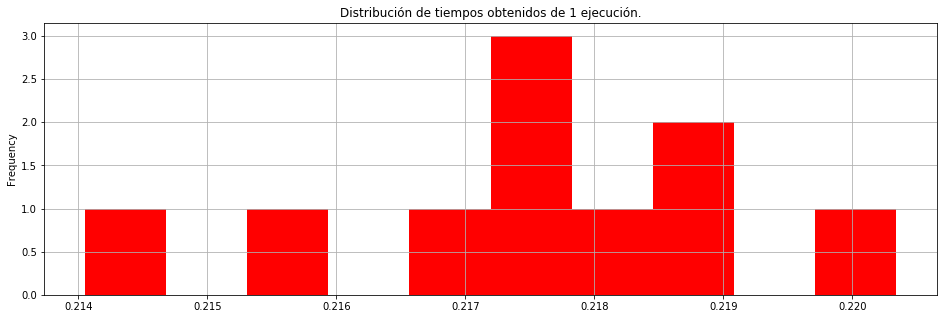

In [44]:
import matplotlib.pyplot as plt
unique_executions.plot(kind='hist',color='red',
                        grid=True, title='Distribución de tiempos obtenidos de 1 ejecución.',
                        figsize=(16,5))
plt.show()

In [45]:
from scipy import stats
import numpy as np
import scipy as sp
mean = np.mean(data)
mean_iterative = mean
std = np.std(data)
var = data.var()
print("Media", executions,"ejecuciones:", mean, "s.")
print("Desviación estándar", executions,"ejecuciones:", std, ".")
print("Intervalo de confianza", executions, "ejecuciones:",stats.norm.interval(0.05,loc=mean,scale=std) ,".")
print("Media 1 ejecución:", np.mean(unique_executions), "s.")

Media 25.0 ejecuciones: 5.438448 s.
Desviación estándar 25.0 ejecuciones: 0.0415899546333 .
Intervalo de confianza 25.0 ejecuciones: (5.4358400279501407, 5.4410559720498579) .
Media 1 ejecución: 0.21753792 s.


## Conclusiones

Para el problema dado: 
- Se diseñó un algoritmo iterativo que aplica la función de transformación dada a los dinstintos elementos de las componentes RGB de 2 imágenes y crea una tercera. 
- Tras 10 muestreos se puede decir que dicho algoritmo es capáz de procesar 25 imágenes en $5.438448$ segundos. O lo que es lo mismo, $4.6$ imágenes por segundo.

------------------------------------
# Versión monohilo SIMD

Esta versión consiste en, con el programa anterior sustituir aquellas instrucciones que se realicen con caracter repetitivo cobre elementos de un vector por instrucciones SIMD, estas operaciones permiten realizar una misma tarea sobre varios elementos de un vector al mismo tiempo. Y por tanto se debería de optimizar el programa ya que se realizarán menos operaciones.

Así mismo, para este trabajo en grupo se nos asignó usar instrucciones SIMD de tamaño 128 bits y tipo `float`. Con lo que sabiendo que un `float` necesita 32 bits podemos operar sobre 128/32 = 4 elementos de los vectores de píxeles al mimo tiempo.

## Instrucciones SIMD soportadas

En nuestro caso se soportan las instrucciones: MMX, SSE, SSE2, SSE3, SSSE3, SSE4.1, SSE4.2, AVX. Esto puede comprobarse en el documento `cpuinfo.txt` que se suministra en el directorio `/data`.

## Algoritmo SIMD

De la misma forma que hicimos en el algoritmo secuencial aplicamos nuestra función general de transformación a cada uno de los valores de los vectores de información de las imágenes de entrada y guardamos el resultado en la imagen de salida.

### Pseudocódigo

$imagenEntrada_{1} = [ r_{11}, r_{12}, r_{13},...,r_{1n}, g_{11}, g_{12}, g_{13},...,g_{1n}, b_{11}, b_{12}, b_{13},...,b_{1n}]$

$imagenEntrada_{2} = [ r_{21}, r_{22}, r_{23},...,r_{2n}, g_{21}, g_{22}, g_{23},...,g_{2n}, b_{21}, b_{22}, b_{23},...,b_{2n}]$

$imagenSalida = [ancho \cdot alto \cdot numeroComponentes]$

PARA CADA i DESDE i=0 HASTA i < $(ancho \cdot alto \cdot numeroComponentes)$

$$imagenSalida[i] = \frac{\sqrt{imagenEntrada_{1}[i]^{2} + imagenEntrada_{2}[i]^{2}}}{\sqrt{2}}$$

### C++

Para implamentar el pseudocódigo anterior con instrucciones SIMD lo primero fue identificar qué intruscciones debíamos usar. Recordemos que debemos de trabajar sobre vectores de información con formato de `float`. A esto se le suma la restricción de usar paquetes de datos de 128 bits, por lo que estas són las instrucciones intrínsecas que usaremos para implementar el algoritmo.

 - Para cargar los vectores de información -> `_mm_loadu_ps`.
 - Para realizar el cuadrado usaremos una múltiplicación de un elemento por el mismo ya que no existe la función potencia necesaria, por tanto -> `_mm_mul_ps`.
 - Para sumar -> `_mm_add_ps`.
 - Para la raíz cuadrada -> `_mm_sqrt_ps`.
 - Para dividir -> `_mm_div_ps`.
 - Para guardar en el vector de infomación de la imagen resultante -> `_mm_storeu_ps`.
 
 > **Nota:** En las instrucciones intrínsecas anteriores el sufijo u en load y store significa que se realiza sobre elementos no alineados. Y el sufijo `_ps` en todas las instrucciones nos indica que es una operación con punto flotante.

Una vez tenemos las instrucciones identificadas pasamos a realizar la implementación en código, lo que supone dividir la función general de transformación en operaciones simples y juntar los resultados parciales hasta aplicar la función a un paquete de datos entero. A continuación repetir el proceso para todos los paquetes de datos que sea necesario.

`PIXELS_PER_DATA_PACKAGE` = 128 bits / 32 bits = paquetes de 4 elementos.

```c++
for (int i = 0; i < IMAGES_SIZE; i += PIXELS_PER_DATA_PACKAGE) {

    // Loading input images.
    dataPackageImage1 = _mm_loadu_ps(&p_compImage1[i]);
    dataPackageImage2 = _mm_loadu_ps(&p_compImage2[i]);

    // Computing the squares.
    squareDP1 = _mm_mul_ps(dataPackageImage1, dataPackageImage1);
    squareDP2 = _mm_mul_ps(dataPackageImage2, dataPackageImage2);

    // Multiplying the squares.
    productOfSquaresDP12 = _mm_add_ps(squareDP1, squareDP2);

    // Computing the square root of the multiplication of the squares.
    squarerootDPS = _mm_sqrt_ps(productOfSquaresDP12);

    // Computing the division of the squarerootDPS over the square root of 2.
    division = _mm_div_ps(squarerootDPS, V_SQRT2);

    // Storing the result on to the destination image information vector.
    _mm_storeu_ps(&p_dstImage[i], division);

}

```

> **Nota**: _Como la versión secuencial del algoritmo se ejecutó un total de 25 veces, la versión SIMD también se ejeutará un total de 25 veces para obtener una medida de comparación válida._

## Análisis del algoritmo implementado
Para el algoritmo anterior se obtienen los siguientes datos tras realizar 10 ejecuciones en modo release:

In [46]:
data = pd.Series([1.501447,1.617852,1.676274,1.644540,1.558858,1.689538,1.562833,1.566737,1.633283,1.622175],
                 index=['1', '2', '3', '4', '5', '6', '7', '8', '9', '10'])
unique_executions = data/executions
table = pd.DataFrame({'Duración (s) X 3 Ejecuciones':data})
table

,Duración (s) X 3 Ejecuciones
1,1.501447
2,1.617852
3,1.676274
4,1.644540
5,1.558858
6,1.689538
7,1.562833
8,1.566737
9,1.633283
10,1.622175


De la tabla anterior podemos obtener un histograma, como hicimos en la versión secuencial, con la frecuencia con la que se obtienen los distintos tiempos de ejecución del algoritmo (para 1 única ejecución). Sin embargo en este caso los resultados están más dispersos que en la versión secuencial. Esto se puede deber a que al requerir menos tiempo para ejecutarse se ve más afectado a variaciones del sistema. Por lo tanto la desviación estándar será mayor.

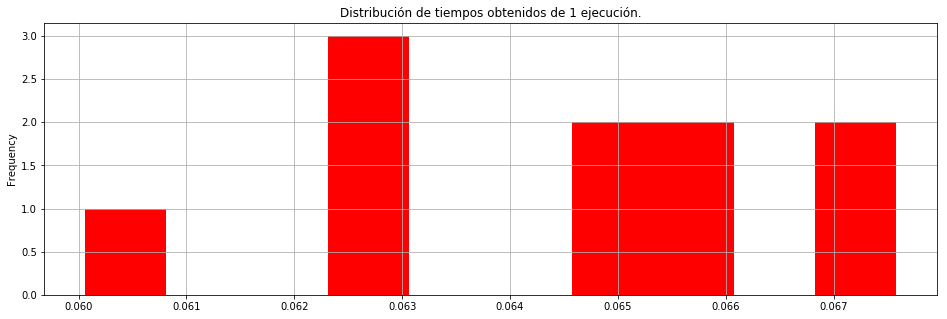

In [47]:
unique_executions.plot(kind='hist',color='red',
                        grid=True, title='Distribución de tiempos obtenidos de 1 ejecución.',
                        figsize=(16,5))
plt.show()

In [48]:
mean = np.mean(data)
std = np.std(data)
var = data.var()
print("Media", executions,"ejecuciones:", mean, "s.")
print("Desviación estándar", executions,"ejecuciones:", std, ".")
print("Intervalo de confianza", executions, "ejecuciones:",stats.norm.interval(0.05,loc=mean,scale=std) ,".")
print("Media 1 ejecución:", np.mean(unique_executions), "s.")
print("Acceleración respecto a versión secuencial:", mean_iterative/mean)

Media 25.0 ejecuciones: 1.6073537 s.
Desviación estándar 25.0 ejecuciones: 0.0557576656004 .
Intervalo de confianza 25.0 ejecuciones: (1.6038573164445618, 1.6108500835554387) .
Media 1 ejecución: 0.064294148 s.
Acceleración respecto a versión secuencial: 3.38347931759


## Conclusiones

Para el problema dado: 
- Se diseñó un algoritmo monohilo empleando instrucciones SIMD que aplica la función de transformación dada a los dinstintos elementos de las componentes RGB de 2 imágenes y crea una tercera. 
- Tras 10 muestreos se puede decir que dicho algoritmo es capáz de procesar 25 imágenes en $0.064294148$ segundos. O lo que es lo mismo, $15.6$ imágenes por segundo, unas 11 imágenes más que la versión secuencial por segundo.
- Si calculamos la aceleración de la versión SIMD con respecto a la versión secuencial observamos una aceleración de 3.38347931759.

--------------------------------
# Versión multihilo

------------------------------------------
# Referencias